In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [154]:
data=pd.read_csv('files_for_lab/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [155]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [156]:
data = data[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
data.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [157]:
data['Churn'] = data['Churn'] == 'Yes'
data['Churn'] = data['Churn'].astype(int)
data.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


In [158]:
X = data.drop('Churn',axis = 1)
y = data['Churn']

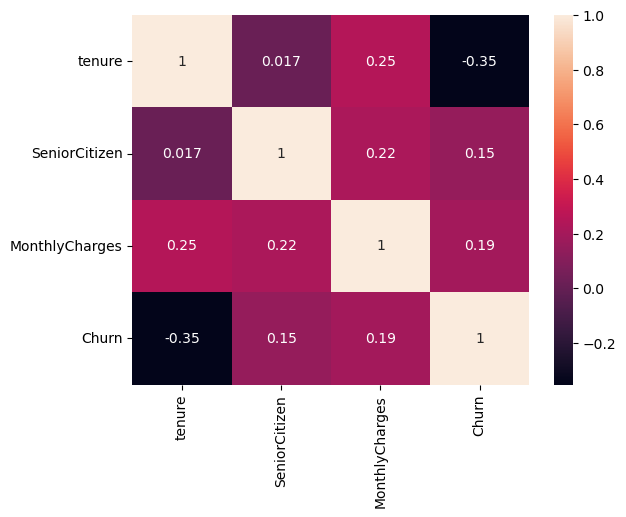

In [159]:
correlations_matrix = data.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [161]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)
# because this is the only tranformation we apply to the numerics, 
# we can immediately transform the X_test as well
X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


In [162]:
y_train = y_train.reset_index(drop=True) 
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True) 

In [163]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [164]:
LR.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [165]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)

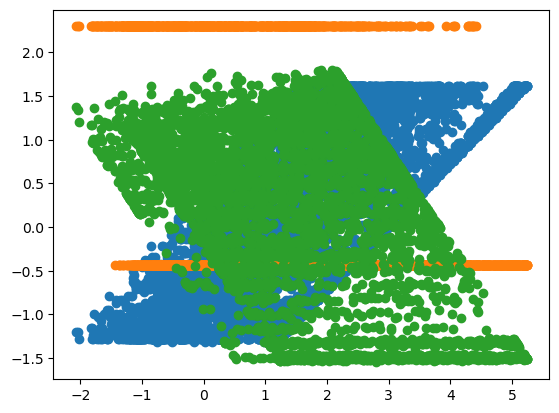

In [166]:
for col in X.columns:
    plt.scatter(logits,X_train_scaled[col])

<AxesSubplot:>

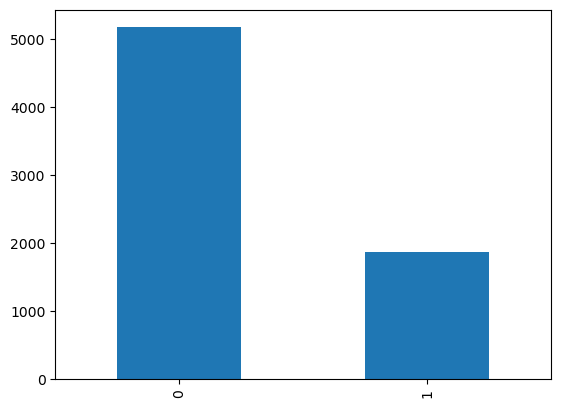

In [167]:
count_classes = data['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [168]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled, y_train)
LR.score(X_test_scaled, y_test)

0.7808063600227144

In [169]:
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


In [170]:
confusion_matrix(y_test,pred)

array([[1164,  134],
       [ 252,  211]])

In [171]:
train = pd.concat([X_train_scaled, y_train],axis=1)
train.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
2,-1.196572,-0.435476,-0.819594,1
3,1.168670,-0.435476,-1.483535,0
4,-0.829552,-0.435476,0.658427,1


In [172]:
no_churn = train[train['Churn']==0]
yes_churn = train[train['Churn']==1]

In [173]:
display(no_churn.shape)
display(yes_churn.shape)

(3876, 4)

(1406, 4)

In [174]:
# oversample minority
yes_churn_oversampled = resample(yes_churn,
                                    replace=True,
                                    n_samples = len(no_churn),
                                    random_state=0)

In [175]:
display(no_churn.shape)
display(yes_churn_oversampled.shape)

(3876, 4)

(3876, 4)

In [176]:
train_oversampled = pd.concat([no_churn,yes_churn_oversampled],axis=0)
train_oversampled.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,-0.340191,-0.435476,-0.514314,0
1,0.883210,2.296336,0.017840,0
3,1.168670,-0.435476,-1.483535,0
5,1.046330,-0.435476,0.503285,0
6,-0.258631,-0.435476,0.701800,0


In [177]:
y_train_over = train_oversampled['Churn'].copy()
X_train_over = train_oversampled.drop('Churn',axis = 1).copy()

In [178]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_over, y_train_over)
pred = LR.predict(X_test_scaled)

In [179]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4790764790764791
recall:  0.7170626349892009
f1:  0.57439446366782


In [180]:
confusion_matrix(y_test,pred)

array([[937, 361],
       [131, 332]])

In [181]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [182]:
X_train_SMOTE.shape

(7752, 3)

In [183]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [184]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])